# Group 5
## Team members:
- Jianting Liu(8950907)
- David (8999846) 
- Marieth (9016702)


### Use case
The analysis examines the relationship between housing prices, income, and population in Canada over a 20-year period. By incorporating population data alongside existing housing prices and income metrics, we can better understand the demographic pressures on housing affordability.

## load data

In [36]:
import pandas as pd

# read data
df = pd.read_excel('./final_merged_data.xlsx')

# convert column
df_melted = pd.melt(
   df,
   id_vars=['Date','Median income','Population'],  # remain column
   value_vars=['One_storey', 'Two_storey', 'Townhouse', 'Apartment_unit', 'Composite'],  # convert columns
   var_name='property_type',  # new column
   value_name='price'  # new price
)
df_melted
df_melted.to_csv('melted_data.csv', index=False)

df = pd.read_csv('melted_data.csv')


## Converting factor variables to numeric


In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import stats
from scipy.special import boxcox1p

def convert_factors_to_numeric(df):
    le = LabelEncoder()
    factor_columns = df.select_dtypes(include=['object']).columns
    for col in factor_columns:
        df[col] = le.fit_transform(df[col])
    return df
after_numeric_df= convert_factors_to_numeric(df)
after_numeric_df

,Date,Median income,Population,property_type,price
0,0,4487.500000,1.069167e+07,2,207700
1,1,4487.500000,1.069167e+07,2,208400
2,2,4487.500000,1.069167e+07,2,209200
3,3,4487.500000,1.071352e+07,2,210100
4,4,4487.500000,1.071352e+07,2,210600
...,...,...,...,...,...
1070,210,5066.666667,1.297864e+07,1,765100
1071,211,5066.666667,1.297864e+07,1,749600
1072,212,5066.666667,1.297864e+07,1,739200
1073,213,5066.666667,1.309317e+07,1,731400


## Converting calendar dates to Julian


In [38]:
def convert_dates_to_julian(df, date_column):
    df[f'{date_column}_julian'] = pd.to_datetime(df[date_column]).map(lambda x: x.to_julian_date())
    return df
after_convert_date=convert_dates_to_julian(after_numeric_df,'Date')
after_convert_date

,Date,Median income,Population,property_type,price,Date_julian
0,0,4487.500000,1.069167e+07,2,207700,2440587.5
1,1,4487.500000,1.069167e+07,2,208400,2440587.5
2,2,4487.500000,1.069167e+07,2,209200,2440587.5
3,3,4487.500000,1.071352e+07,2,210100,2440587.5
4,4,4487.500000,1.071352e+07,2,210600,2440587.5
...,...,...,...,...,...,...
1070,210,5066.666667,1.297864e+07,1,765100,2440587.5
1071,211,5066.666667,1.297864e+07,1,749600,2440587.5
1072,212,5066.666667,1.297864e+07,1,739200,2440587.5
1073,213,5066.666667,1.309317e+07,1,731400,2440587.5


## Converting categorical values to dummies
 

In [39]:
def create_dummies(df):
    categorical_columns = ['property_type']
    df_dummies = pd.get_dummies(df, columns=categorical_columns)
    return df_dummies
after_onehot_df = create_dummies(df)
after_onehot_df.head(10)

,Date,Median income,Population,price,Date_julian,property_type_0,property_type_1,property_type_2,property_type_3,property_type_4
0,0,4487.5,1.069167e+07,207700,2440587.5,False,False,True,False,False
1,1,4487.5,1.069167e+07,208400,2440587.5,False,False,True,False,False
2,2,4487.5,1.069167e+07,209200,2440587.5,False,False,True,False,False
3,3,4487.5,1.071352e+07,210100,2440587.5,False,False,True,False,False
4,4,4487.5,1.071352e+07,210600,2440587.5,False,False,True,False,False
5,5,4487.5,1.071352e+07,211400,2440587.5,False,False,True,False,False
6,6,4487.5,1.074758e+07,213600,2440587.5,False,False,True,False,False
7,7,4487.5,1.074758e+07,215900,2440587.5,False,False,True,False,False
8,8,4487.5,1.074758e+07,218400,2440587.5,False,False,True,False,False
9,9,4487.5,1.078444e+07,221000,2440587.5,False,False,True,False,False


## Performing Box-Cox transformations


In [46]:
#only for positive values
def apply_box_cox(df, numeric_columns):
    for col in numeric_columns:
        # positive
        offset = 0
        if min(df[col]) <= 0:
            offset = abs(min(df[col])) + 1
        df[f'{col}_boxcox'] = boxcox1p(df[col] + offset, 0.25)
    return df
numeric_columns = ['Median income','Population']
after_transform = apply_box_cox(after_convert_date,numeric_columns)
after_transform.head(10)

,Date,Median income,Population,property_type,price,Date_julian,Median income_boxcox,Population_boxcox,price_boxcox,Median income_tukey,Population_tukey,price_tukey
0,0,4487.5,1.069167e+07,2,207700,2440587.5,28.740499,224.729084,81.392482,0.564556,1.101495,2.249369
1,1,4487.5,1.069167e+07,2,208400,2440587.5,28.740499,224.729084,81.464340,0.564556,1.101495,2.249384
2,2,4487.5,1.069167e+07,2,209200,2440587.5,28.740499,224.729084,81.546241,0.564556,1.101495,2.249401
3,3,4487.5,1.071352e+07,2,210100,2440587.5,28.740499,224.845869,81.638100,0.564556,1.101495,2.249420
4,4,4487.5,1.071352e+07,2,210600,2440587.5,28.740499,224.845869,81.689005,0.564556,1.101495,2.249430
5,5,4487.5,1.071352e+07,2,211400,2440587.5,28.740499,224.845869,81.770265,0.564556,1.101495,2.249447
6,6,4487.5,1.074758e+07,2,213600,2440587.5,28.740499,225.027507,81.992547,0.564556,1.101495,2.249492
7,7,4487.5,1.074758e+07,2,215900,2440587.5,28.740499,225.027507,82.223104,0.564556,1.101495,2.249539
8,8,4487.5,1.074758e+07,2,218400,2440587.5,28.740499,225.027507,82.471630,0.564556,1.101495,2.249589
9,9,4487.5,1.078444e+07,2,221000,2440587.5,28.740499,225.223622,82.727844,0.564556,1.101495,2.249640


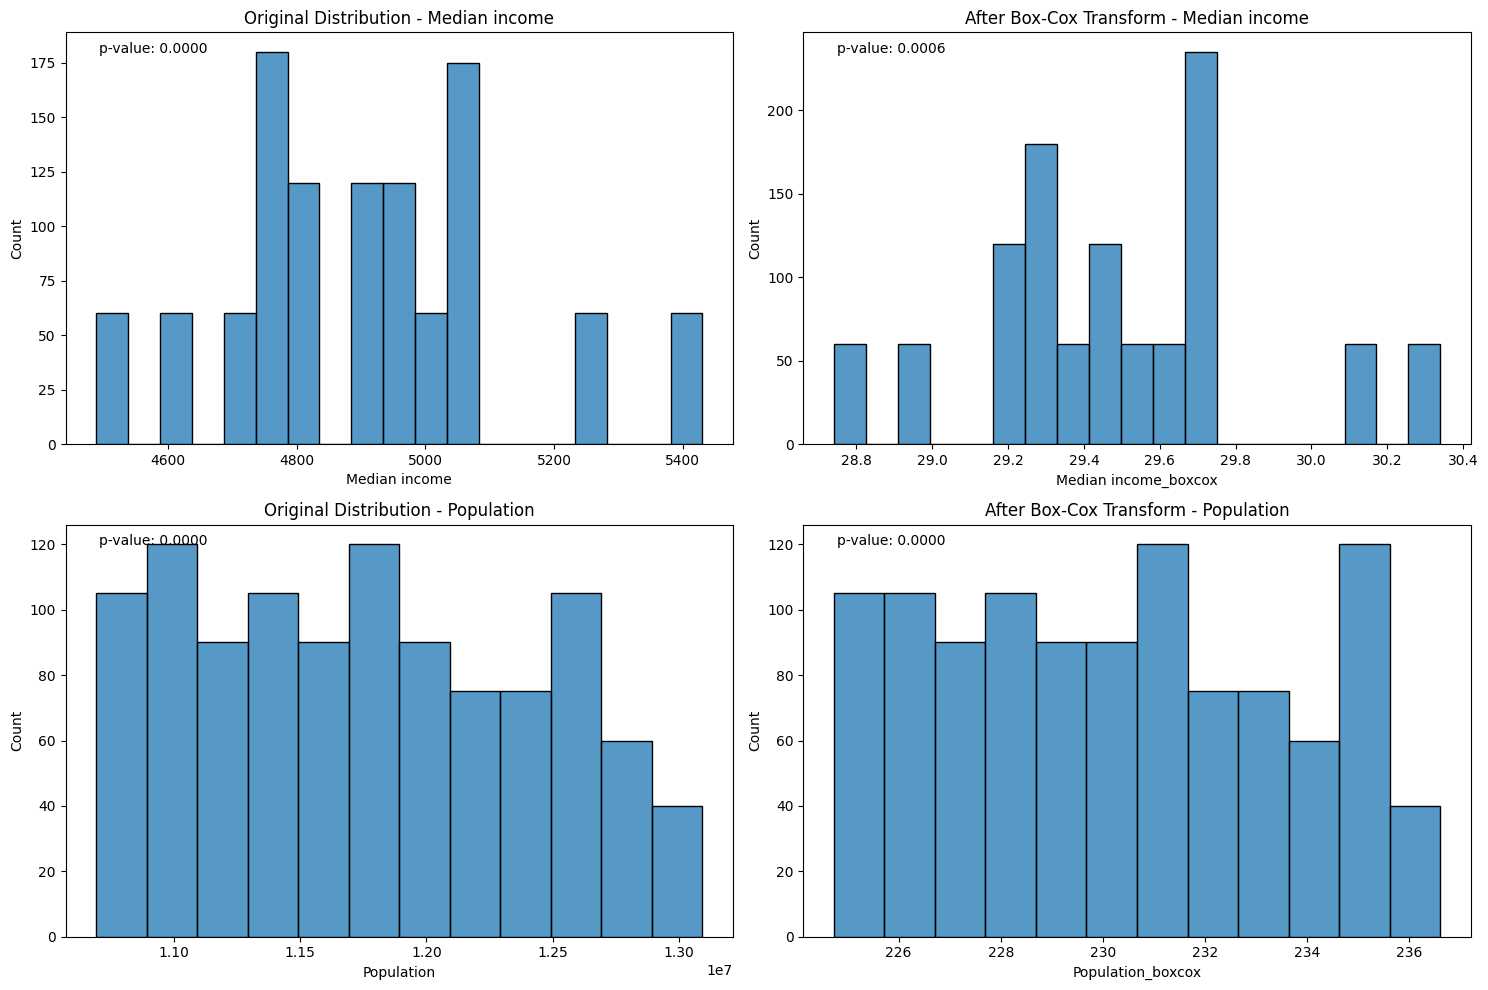

In [47]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxcox_distributions(df, numeric_columns):
   n_cols = len(numeric_columns)
   fig, axs = plt.subplots(n_cols, 2, figsize=(15, 5*n_cols))
   
   for idx, col in enumerate(numeric_columns):
       # Original distribution
       sns.histplot(data=df[col], ax=axs[idx,0])
       axs[idx,0].set_title(f'Original Distribution - {col}')
       stat_orig, p_orig = stats.normaltest(df[col])
       axs[idx,0].text(0.05, 0.95, f'p-value: {p_orig:.4f}', 
                      transform=axs[idx,0].transAxes)
       
       # Box-Cox transformed distribution  
       sns.histplot(data=df[f'{col}_boxcox'], ax=axs[idx,1])
       axs[idx,1].set_title(f'After Box-Cox Transform - {col}')
       stat_boxcox, p_boxcox = stats.normaltest(df[f'{col}_boxcox'])
       axs[idx,1].text(0.05, 0.95, f'p-value: {p_boxcox:.4f}',
                      transform=axs[idx,1].transAxes)
   
   plt.tight_layout()
   plt.show()

# Plot distributions
plot_boxcox_distributions(after_transform, numeric_columns)

## Applying Tukey's Ladder


In [48]:
#can handle negtive values and 0
def apply_tukey_ladder(df, numeric_columns):
    for col in numeric_columns:
        df[f'{col}_tukey'] = stats.yeojohnson(df[col])[0]
    return df
after_tukey = apply_tukey_ladder(after_onehot_df,numeric_columns)
after_tukey




,Date,Median income,Population,price,Date_julian,property_type_0,property_type_1,property_type_2,property_type_3,property_type_4,Median income_tukey,Population_tukey,price_tukey
0,0,4487.500000,1.069167e+07,207700,2440587.5,False,False,True,False,False,0.564556,1.101495,2.249369
1,1,4487.500000,1.069167e+07,208400,2440587.5,False,False,True,False,False,0.564556,1.101495,2.249384
2,2,4487.500000,1.069167e+07,209200,2440587.5,False,False,True,False,False,0.564556,1.101495,2.249401
3,3,4487.500000,1.071352e+07,210100,2440587.5,False,False,True,False,False,0.564556,1.101495,2.249420
4,4,4487.500000,1.071352e+07,210600,2440587.5,False,False,True,False,False,0.564556,1.101495,2.249430
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070,210,5066.666667,1.297864e+07,765100,2440587.5,False,True,False,False,False,0.564556,1.101495,2.253759
1071,211,5066.666667,1.297864e+07,749600,2440587.5,False,True,False,False,False,0.564556,1.101495,2.253708
1072,212,5066.666667,1.297864e+07,739200,2440587.5,False,True,False,False,False,0.564556,1.101495,2.253672
1073,213,5066.666667,1.309317e+07,731400,2440587.5,False,True,False,False,False,0.564556,1.101495,2.253645


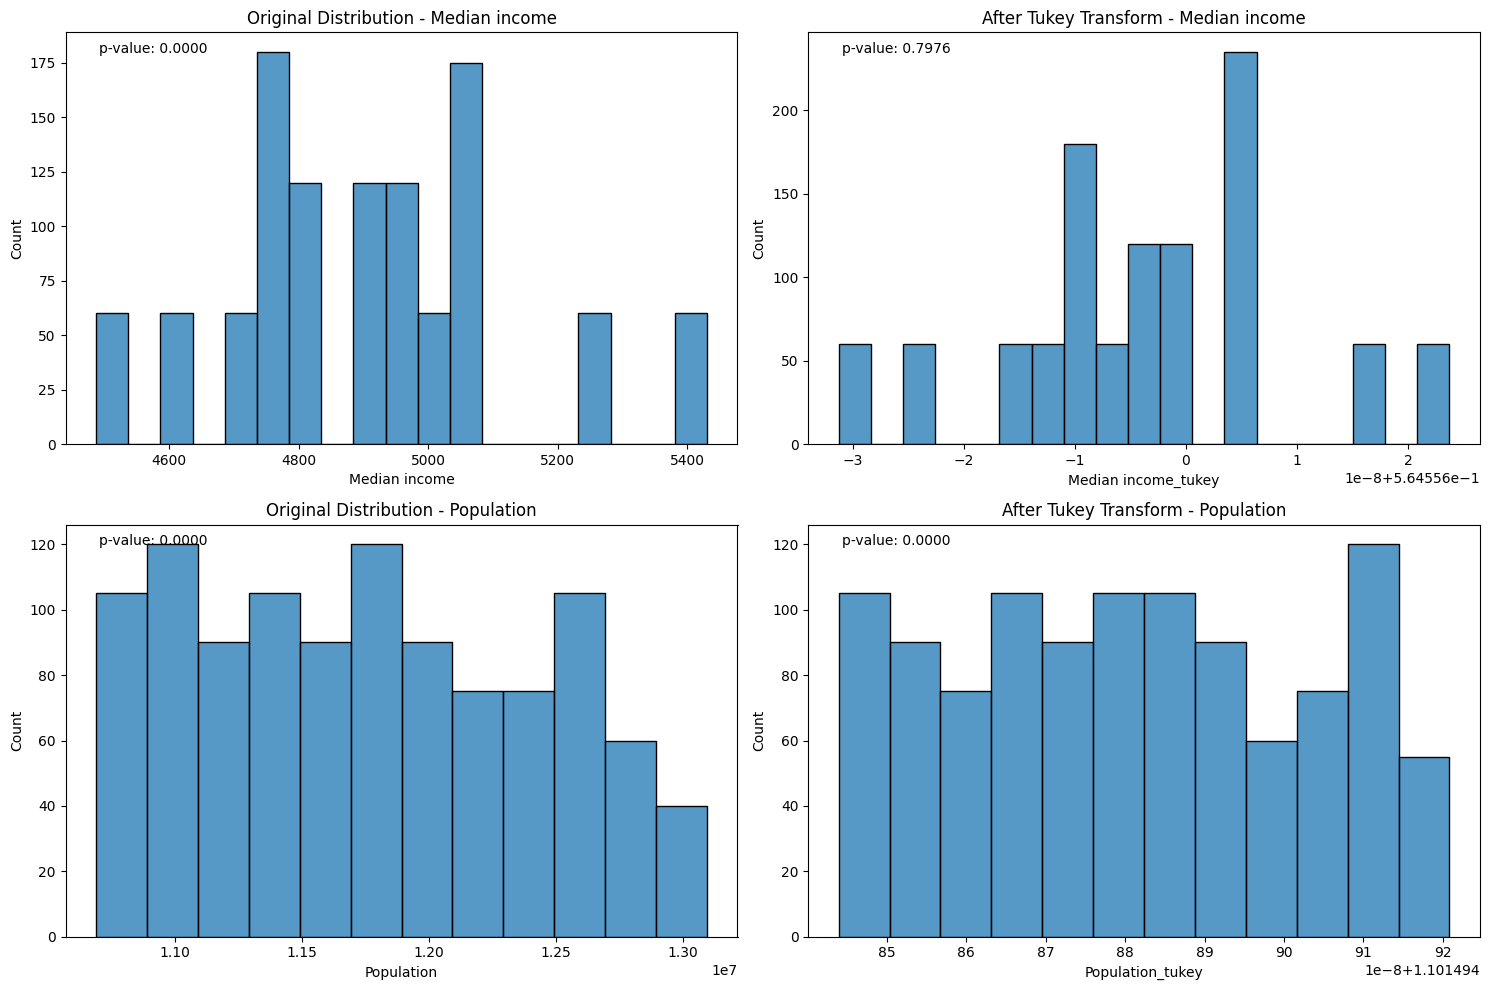

In [49]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distributions(df, numeric_columns):
   n_cols = len(numeric_columns)
   fig, axs = plt.subplots(n_cols, 2, figsize=(15, 5*n_cols))
   
   for idx, col in enumerate(numeric_columns):
       # original data
       sns.histplot(data=df[col], ax=axs[idx,0])
       axs[idx,0].set_title(f'Original Distribution - {col}')
       
       # Tukey
       sns.histplot(data=df[f'{col}_tukey'], ax=axs[idx,1])
       axs[idx,1].set_title(f'After Tukey Transform - {col}')
       
       # normalized test
       stat_orig, p_orig = stats.normaltest(df[col])
       stat_tukey, p_tukey = stats.normaltest(df[f'{col}_tukey'])
       
       axs[idx,0].text(0.05, 0.95, f'p-value: {p_orig:.4f}', 
                      transform=axs[idx,0].transAxes)
       axs[idx,1].text(0.05, 0.95, f'p-value: {p_tukey:.4f}',
                      transform=axs[idx,1].transAxes)
   
   plt.tight_layout()
   plt.show()

# show result
plot_distributions(after_tukey, numeric_columns)

## Perform SLR and MLR methods and analyze the results

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

def perform_regression_analysis(df, target_column):
    # slr
    def simple_linear_regression(X, y):
        model = LinearRegression()
        X = X.values.reshape(-1, 1)
        model.fit(X, y)
        return model, model.score(X, y)
    
    # slr for every feature
    slr_results = {}
    features = [col for col in df.columns if col != target_column]
    
    for feature in features:
        model, r2 = simple_linear_regression(df[feature], df[target_column])
        slr_results[feature] = {
            'coefficient': model.coef_[0],
            'intercept': model.intercept_,
            'r2': r2
        }
    
    # mlr
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    mlr_model = LinearRegression()
    mlr_model.fit(X_train, y_train)
    
    mlr_results = {
        'coefficients': dict(zip(X.columns, mlr_model.coef_)),
        'intercept': mlr_model.intercept_,
        'r2_train': mlr_model.score(X_train, y_train),
        'r2_test': mlr_model.score(X_test, y_test)
    }
    
    return slr_results, mlr_results

# plot
def plot_regression_results(df, slr_results, mlr_results, target_column):
    # SLR 
    plt.figure(figsize=(15, 5))
    
    # R²
    plt.subplot(121)
    r2_values = {k: v['r2'] for k, v in slr_results.items()}
    plt.bar(r2_values.keys(), r2_values.values())
    plt.xticks(rotation=45)
    plt.title('R² Values for Simple Linear Regression')
    
    # MLR predict vs actual
    plt.subplot(122)
    mlr_model = LinearRegression()
    X = df.drop(target_column, axis=1)
    mlr_model.fit(X, df[target_column])
    y_pred = mlr_model.predict(X)
    
    plt.scatter(df[target_column], y_pred)
    plt.plot([df[target_column].min(), df[target_column].max()],
             [df[target_column].min(), df[target_column].max()],
             'r--')
    plt.title('Actual vs Predicted Values (MLR)')
    
    plt.tight_layout()
    plt.show()
perform_regression_analysis(after_tukey,'price')

({'Date': {'coefficient': np.float64(2061.445289671328),
   'intercept': np.float64(188074.19121447028),
   'r2': 0.6197494306133529},
  'Median income': {'coefficient': np.float64(510.24780342498417),
   'intercept': np.float64(-2098076.0033284496),
   'r2': 0.47903722530424064},
  'Population': {'coefficient': np.float64(0.1936245179440556),
   'intercept': np.float64(-1869117.491784086),
   'r2': 0.6305182026404647},
  'property_type': {'coefficient': np.float64(42274.18604651161),
   'intercept': np.float64(324100.46511627914),
   'r2': 0.1353214790691134},
  'Date_julian': {'coefficient': np.float64(0.0),
   'intercept': np.float64(408648.83720930235),
   'r2': 0.0},
  'Median income_boxcox': {'coefficient': np.float64(301522.0627911009),
   'intercept': np.float64(-8481306.647486908),
   'r2': 0.4810150839883355},
  'Population_boxcox': {'coefficient': np.float64(38797.92799160762),
   'intercept': np.float64(-8522215.05517546),
   'r2': 0.6251427850518747},
  'price_boxcox': {'c